In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/크몽/IRR/'
df = pd.read_csv(base_path + 'DataTableforFigure3-수정.csv')

# 전처리

In [ ]:
# Function to extract numbers within brackets
def extract_bracket_numbers(text):
    if pd.isna(text) or not isinstance(text, str):
        return None
    match = re.search(r'\((.*?)\)', text)
    if match:
        return match.group(1)
    return None

# Function to remove numbers within brackets
def remove_bracket_numbers(text):
    if pd.isna(text) or not isinstance(text, str):
        return None
    return re.sub(r'\s?\(.*?\)', '', text)

# Create new columns
df['Overall_Lower_Upper'] = df['Overall'].apply(extract_bracket_numbers)
df['mRNA vaccine_Lower_Upper'] = df['mRNA vaccine'].apply(extract_bracket_numbers)
df['ChAdOx1 nCov-19 vaccine_Lower_Upper'] = df['ChAdOx1 nCov-19 vaccine '].apply(extract_bracket_numbers)
df['Mixed-match_Lower_Upper'] = df['Mixed-match'].apply(extract_bracket_numbers)

# Create a new column with numbers within brackets removed
df['Overall'] = df['Overall'].apply(remove_bracket_numbers)
df['mRNA vaccine'] = df['mRNA vaccine'].apply(remove_bracket_numbers)
df['ChAdOx1 nCov-19 vaccine '] = df['ChAdOx1 nCov-19 vaccine '].apply(remove_bracket_numbers)
df['Mixed-match'] = df['Mixed-match'].apply(remove_bracket_numbers)

# Split the new column into two separate columns
df[['Overall_Lower', 'Overall_Upper']] = df['Overall_Lower_Upper'].str.split('-', expand=True)
df[['mRNA_Lower', 'mRNA_Upper']] = df['mRNA vaccine_Lower_Upper'].str.split('-', expand=True)
df[['ChAdOx1_Lower', 'ChAdOx1_Upper']] = df['ChAdOx1 nCov-19 vaccine_Lower_Upper'].str.split('-', expand=True)
df[['Mixed_Lower', 'Mixed_Upper']] = df['Mixed-match_Lower_Upper'].str.split('-', expand=True)

# Remove the temporary column
df.drop(columns=['Overall_Lower_Upper'], inplace=True)
df.drop(columns=['mRNA vaccine_Lower_Upper'], inplace=True)
df.drop(columns=['ChAdOx1 nCov-19 vaccine_Lower_Upper'], inplace=True)
df.drop(columns=['Mixed-match_Lower_Upper'], inplace=True)

# Replace '-' with None in the DataFrame
df.replace('-', None, inplace=True)

# Object열을 숫자로 변환
df['Overall'] = pd.to_numeric(df['Overall'])
df['mRNA vaccine'] = pd.to_numeric(df['mRNA vaccine'])
df['ChAdOx1 nCov-19 vaccine '] = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine '])
df['Mixed-match'] = pd.to_numeric(df['Mixed-match'])

df['Overall_Lower'] = pd.to_numeric(df['Overall_Lower'])
df['Overall_Lower'] = df['Overall'] - df['Overall_Lower']
df['Overall_Upper'] = pd.to_numeric(df['Overall_Upper'])
df['Overall_Upper'] = df['Overall_Upper'] - df['Overall']
# df['Overall_Upper'] = df['Overall_Upper'].apply(lambda x: np.where(x > 40, 40, x))

df['mRNA_Lower'] = pd.to_numeric(df['mRNA_Lower'])
df['mRNA_Lower'] = df['mRNA vaccine'] - df['mRNA_Lower']
df['mRNA_Upper'] = pd.to_numeric(df['mRNA_Upper'])
df['mRNA_Upper'] = df['mRNA_Upper'] - df['mRNA vaccine']
# df['mRNA_Upper'] = df['mRNA_Upper'].apply(lambda x: np.where(x > 40, 40, x))

df['ChAdOx1_Lower'] = pd.to_numeric(df['ChAdOx1_Lower'])
df['ChAdOx1_Lower'] = df['ChAdOx1 nCov-19 vaccine '] - df['ChAdOx1_Lower']
# df['ChAdOx1_Upper'] = pd.to_numeric(df['ChAdOx1_Upper'])

df['Mixed_Lower'] = pd.to_numeric(df['Mixed_Lower'])
df['Mixed_Lower'] = df['Mixed-match'] - df['Mixed_Lower']
df['Mixed_Upper'] = pd.to_numeric(df['Mixed_Upper'])
df['Mixed_Upper'] = df['Mixed_Upper'] - df['Mixed-match']
# df['Mixed_Upper'] = df['Mixed_Upper'].apply(lambda x: np.where(x > 40, 40, x))

# # Converting other relevant columns to numeric types
# df['Overall'] = pd.to_numeric(df['Overall'], errors='coerce')
# df['mRNA vaccine'] = pd.to_numeric(df['mRNA vaccine'], errors='coerce')
# df['ChAdOx1 nCov-19 vaccine '] = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine '], errors='coerce')
# df['Mixed-match'] = pd.to_numeric(df['Mixed-match'], errors='coerce')

,CV risk,Time period,Overall,mRNA vaccine,ChAdOx1 nCov-19 vaccine,Mixed-match,Overall_Lower,Overall_Upper,mRNA_Lower,mRNA_Upper,ChAdOx1_Lower,ChAdOx1_Upper,Mixed_Lower,Mixed_Upper
0,Myocardial infarction,Pre-risk period,0.34,0.16,0.64,0.52,0.15,0.28,0.11,0.35,0.39,1.63,0.34,0.99
1,Myocardial infarction,Risk period after first dose,0.87,0.98,0.57,0.81,0.33,0.52,0.43,0.77,0.40,1.89,0.57,1.93
2,Myocardial infarction,Risk period after 2nd dose,0.71,0.69,0.99,0.63,0.28,0.46,0.33,0.63,0.61,2.57,0.48,2.09
3,Myocardial infarction,Risk period after 3rd dose,1.26,1.29,NaN,1.23,0.59,1.11,0.70,1.51,NaN,None,0.82,2.46
4,Myocardial infarction,Whole risk period,0.86,0.91,0.78,0.89,0.23,0.33,0.30,0.45,0.42,1.69,0.48,1.05
5,Myocardial infarction,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
6,Stroke,Pre-risk period,0.38,0.32,0.23,0.69,0.08,0.11,0.11,0.16,0.09,0.38,0.22,0.34
7,Stroke,Risk period after first dose,0.82,0.96,0.76,0.56,0.15,0.19,0.24,0.31,0.23,1.10,0.23,0.37
8,Stroke,Risk period after 2nd dose,0.81,0.82,1.26,0.37,0.16,0.20,0.21,0.29,0.39,1.81,0.22,0.55
9,Stroke,Risk period after 3rd dose,1.25,1.58,NaN,1.21,0.39,0.55,0.59,0.92,NaN,None,0.56,1.04


In [ ]:
# Remove commas and convert to numeric
df['ChAdOx1_Upper'] = pd.to_numeric(df['ChAdOx1_Upper'].str.replace(',', ''), errors='coerce')
# df['ChAdOx1_Upper'] = df['ChAdOx1_Upper'].apply(lambda x: np.where(x > 40, 40, x))
df['ChAdOx1_Upper'] = df['ChAdOx1_Upper'] - df['ChAdOx1 nCov-19 vaccine ']
# Validate the dtype after conversion
# df['ChAdOx1_Upper'], df['ChAdOx1_Upper'].dtype

(0        0.99
 1        1.32
 2        1.58
 3         NaN
 4        0.91
 5         NaN
 6        0.15
 7        0.34
 8        0.55
 9         NaN
 10       0.30
 11        NaN
 12        NaN
 13     102.01
 14    5879.90
 15        NaN
 16     189.35
 17        NaN
 18        NaN
 19       6.94
 20        NaN
 21        NaN
 22       4.14
 23        NaN
 24       0.14
 25       0.24
 26       0.34
 27        NaN
 28       0.20
 Name: ChAdOx1_Upper, dtype: float64,
 dtype('float64'))

### 그래프

<ipython-input-62-0d4fafb946d8>:202: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


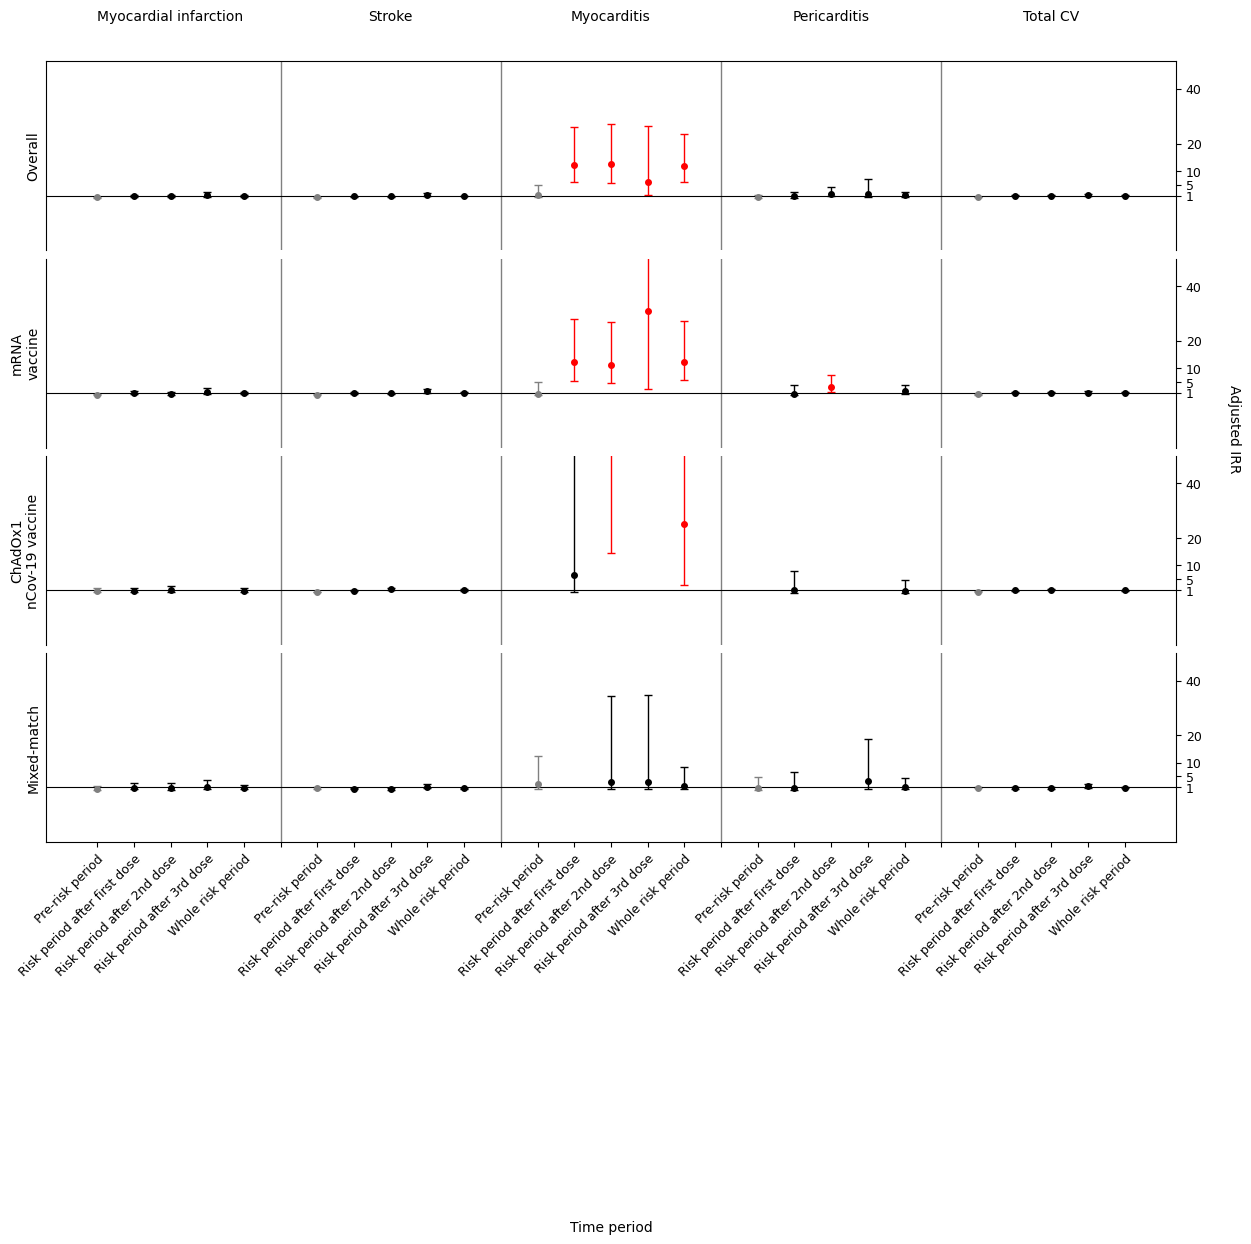

In [ ]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()


# Calculate the midpoints for labels
total_categories = 30
number_of_sections = 5

# Calculate the approximate size of each section
section_length = total_categories // number_of_sections

# Calculate the midpoints for each section
midpoints = [section_length * i + section_length // 2 - 1 for i in range(number_of_sections)]

# Labels to add
labels = ['Myocardial infarction', 'Stroke', 'Myocarditis', 'Pericarditis', 'Total CV']

# Add labels at midpoints
for midpoint, label in zip(midpoints, labels):
    ax[0].text(midpoint, 65, label, ha='center')

# 변환 함수
def transform_y(y):
    return np.interp(y, [-10, -5, 1, 5, 10, 20, 40, 5000], np.linspace(0, 1, 8))

# 역변환 함수 (눈금 레이블을 위해)
def inverse_transform_y(y):
    return np.interp(y, np.linspace(0, 1, 8), [-10, -5, 1, 5, 10, 20, 40, 5000])


# 함수를 정의하거나 람다를 사용하여 y축 눈금과 레이블을 설정합니다.
def format_func(value, tick_number):
    return '{:.0f}'.format(inverse_transform_y(value))


# 각 서브플롯에 대한 색깔을 지정
colors_overall = []
colors_mRNA = []
colors_ChAdOx1 = []
colors_Mixed = []

for i in range(len(Overall_error[0])):
    # For Overall
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_overall.append('grey')
    elif df_Overall[i] - Overall_lower_error[i] > 1:
        colors_overall.append('red')
    else:
        colors_overall.append('black')

    # For mRNA
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_mRNA.append('grey')
    elif df_mRNA[i] - mRNA_lower_error[i] > 1:
        colors_mRNA.append('red')
    else:
        colors_mRNA.append('black')

    # For ChAdOx1
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_ChAdOx1.append('grey')
    elif df_ChAdOx1[i] - ChAdOx1_lower_error[i] > 1:
        colors_ChAdOx1.append('red')
    else:
        colors_ChAdOx1.append('black')

    # For Mixed
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_Mixed.append('grey')
    elif df_Mixed[i] - Mixed_lower_error[i] > 1:
        colors_Mixed.append('red')
    else:
        colors_Mixed.append('black')


# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)

# Overall 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_Overall, colors_overall)):
    lower_error = Overall_error[0][i]
    upper_error = Overall_error[1][i]
    ax[0].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# mRNA 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_mRNA, colors_mRNA)):
    lower_error = mRNA_error[0][i]
    upper_error = mRNA_error[1][i]
    ax[1].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# ChAdOx1 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_ChAdOx1, colors_ChAdOx1)):
    lower_error = ChAdOx1_error[0][i]
    upper_error = ChAdOx1_error[1][i]
    ax[2].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# Mixed 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_Mixed, colors_Mixed)):
    lower_error = Mixed_error[0][i]
    upper_error = Mixed_error[1][i]
    ax[3].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)


# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=45, fontsize=9, va='top', ha='right', rotation_mode='anchor')

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -2)

# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270)


# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 값 범위 설정
y_min = -19  # 변경된 y축 최소값
y_max = 50  # 변경된 y축 최대값

ax[0].set_ylim(y_min, y_max)
ax[1].set_ylim(y_min, y_max)
ax[2].set_ylim(y_min, y_max)
ax[3].set_ylim(y_min, y_max)

# y ticklabel 설정
yticks_values = [1, 5, 10, 20, 40]  # 변경된 y축 눈금값
for ax_i in ax:
    ax_i.set_yticks(yticks_values)
    ax_i.tick_params(axis='y', labelsize=9)  # 폰트 크기 설정

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (우선은 y=0 기준으로 세팅)
ax[0].axhline(1, color='black', linewidth=0.8)
ax[1].axhline(1, color='black', linewidth=0.8)
ax[2].axhline(1, color='black', linewidth=0.8)
ax[3].axhline(1, color='black', linewidth=0.8)

# Adding labels and title
plt.xlabel('Time period')
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


# Show the plot
plt.show()